In [2]:
import pandas as pd

meetings_df = pd.read_json('https://api.openf1.org/v1/meetings?year=2025&country_code=HUN')
meetings_df

,meeting_key,circuit_key,circuit_short_name,meeting_code,location,country_key,country_code,country_name,meeting_name,meeting_official_name,gmt_offset,date_start,year
0,1266,4,Hungaroring,HUN,Budapest,14,HUN,Hungary,Hungarian Grand Prix,FORMULA 1 LENOVO HUNGARIAN GRAND PRIX 2025,02:00:00,2025-08-01T11:30:00+00:00,2025


In [3]:
# Set the meeting_key to the first meeting in the DataFrame
meeting_key = meetings_df['meeting_key'].iloc[0]

In [4]:
sessions_df = pd.read_json(f'https://api.openf1.org/v1/sessions?meeting_key={meeting_key}')
sessions_df

,meeting_key,session_key,location,date_start,date_end,session_type,session_name,country_key,country_code,country_name,circuit_key,circuit_short_name,gmt_offset,year
0,1266,9921,Budapest,2025-08-01T11:30:00+00:00,2025-08-01T12:30:00+00:00,Practice,Practice 1,14,HUN,Hungary,4,Hungaroring,02:00:00,2025
1,1266,9922,Budapest,2025-08-01T15:00:00+00:00,2025-08-01T16:00:00+00:00,Practice,Practice 2,14,HUN,Hungary,4,Hungaroring,02:00:00,2025
2,1266,9923,Budapest,2025-08-02T10:30:00+00:00,2025-08-02T11:30:00+00:00,Practice,Practice 3,14,HUN,Hungary,4,Hungaroring,02:00:00,2025
3,1266,9924,Budapest,2025-08-02T14:00:00+00:00,2025-08-02T15:00:00+00:00,Qualifying,Qualifying,14,HUN,Hungary,4,Hungaroring,02:00:00,2025


In [9]:
# Set the session_key to the first session in the DataFrame
# session_key = sessions_df['session_key'].iloc[0]

laps_df = pd.read_json(f'https://api.openf1.org/v1/laps?session_key>=9921&session_key<=9923')
laps_df.head()

,meeting_key,session_key,driver_number,lap_number,date_start,duration_sector_1,duration_sector_2,duration_sector_3,i1_speed,i2_speed,is_pit_out_lap,lap_duration,segments_sector_1,segments_sector_2,segments_sector_3,st_speed
0,1266,9921,30,1,2025-08-01T11:30:06.363000+00:00,NaN,44.522,28.851,193.0,181.0,True,NaN,"[2064, 2064, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2051, 2051, 2049, 2049]",NaN
1,1266,9921,31,1,2025-08-01T11:30:10.082000+00:00,NaN,40.065,30.099,198.0,202.0,True,NaN,"[2064, 2064, 2049, 2049, 2049, 2051, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049]",NaN
2,1266,9921,87,1,2025-08-01T11:30:16.301000+00:00,NaN,38.989,25.245,221.0,198.0,True,NaN,"[2064, 2064, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2051, 2051, 2049, 2049]",NaN
3,1266,9921,23,1,2025-08-01T11:30:19.400000+00:00,NaN,36.989,27.981,266.0,225.0,True,NaN,"[2064, 2064, 2049, 2049, 2049, 2049, 2051]","[2051, 2051, 2051, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049]",NaN
4,1266,9921,55,1,2025-08-01T11:30:26.734000+00:00,NaN,35.223,27.686,233.0,215.0,True,NaN,"[2064, 2064, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2051, 2051]",NaN


In [10]:
laps_df.describe()

,meeting_key,session_key,driver_number,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,i1_speed,i2_speed,lap_duration,st_speed
count,1463.0,1463.000000,1463.000000,1463.000000,1244.000000,1447.000000,1441.000000,1378.000000,1447.000000,1381.000000,1043.000000
mean,1266.0,9921.905673,30.715653,13.207792,37.831822,35.893039,28.245291,226.158926,209.392536,144.054283,271.555129
std,0.0,0.778025,24.990692,7.792137,12.672324,8.700386,8.778404,56.422685,41.499080,140.995986,42.833131
min,1266.0,9921.000000,1.000000,1.000000,27.479000,26.263000,21.069000,55.000000,70.000000,74.916000,100.000000
25%,1266.0,9921.000000,12.000000,7.000000,28.955000,29.056000,23.044000,181.000000,183.000000,81.902000,253.000000
50%,1266.0,9922.000000,23.000000,13.000000,30.025000,32.351000,25.673000,245.500000,225.000000,98.255000,288.000000
75%,1266.0,9923.000000,44.000000,19.000000,44.539500,42.189500,31.213000,275.000000,242.000000,132.084000,301.000000
max,1266.0,9923.000000,97.000000,32.000000,98.796000,72.299000,170.089000,287.000000,258.000000,1120.908000,313.000000


In [53]:
stints_df = pd.read_json(f'https://api.openf1.org/v1/stints?session_key>=9921&session_key<=9923')
stints_df.head()
stints_df[stints_df['driver_number'] == 81].sort_values(by=['session_key', 'lap_start'])
stints_df['laps'] = stints_df['lap_end'] - stints_df['lap_start'] + 1
stints_df
# stints_df[stints_df['compound'] == 'MEDIUM']['laps'].sum()

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start,laps
0,1266,9921,3,97,9,9,HARD,8,1
1,1266,9921,4,43,10,10,SOFT,0,1
2,1266,9921,4,12,9,10,MEDIUM,0,2
3,1266,9921,3,16,8,10,MEDIUM,7,3
4,1266,9921,3,23,9,11,HARD,0,3
...,...,...,...,...,...,...,...,...,...
314,1266,9923,6,87,15,17,MEDIUM,9,3
315,1266,9923,6,63,15,17,SOFT,0,3
316,1266,9923,6,43,17,21,SOFT,3,5
317,1266,9923,4,44,12,18,SOFT,3,7


In [ ]:
# merge laps and stints data
laps_stints_df = laps_df.merge(stints_df, on=['session_key', 'driver_number'], how='left')
laps_stints_df = laps_stints_df[(laps_stints_df['lap_number'] >= laps_stints_df['lap_start']) & (laps_stints_df['lap_number'] <= laps_stints_df['lap_end'])]
# laps_stints_df = laps_stints_df[(laps_stints_df['lap_duration'] <= laps_stints_df['lap_duration'].quantile(0.5))]
# laps_stints_df = laps_stints_df[(laps_stints_df['lap_duration'].notna())]
laps_stints_df = laps_stints_df[laps_stints_df['compound'] == 'MEDIUM']
laps_stints_df['lap_duration'].describe()

count    355.000000
mean      81.981544
std        3.573002
min       76.525000
25%       79.535500
50%       82.274000
75%       82.872000
max       97.725000
Name: lap_duration, dtype: float64

In [56]:
from utils import outliers_iqr

# build a boolean mask: True if this lap_duration for that driver is an outlier
mask = laps_stints_df.groupby('driver_number')['lap_duration'] \
    .transform(lambda s: s.isin(outliers_iqr(s)))

# keep only the non-outliers
clean_laps_stints_df = laps_stints_df.loc[~mask].reset_index(drop=True)
clean_laps_stints_df.groupby(['driver_number', 'compound']).agg(
    count=('lap_duration', 'count'),
    min=('lap_duration', 'min'),
    q25=('lap_duration', lambda x: x.quantile(0.25)),
    median=('lap_duration', 'median'),
    q75=('lap_duration', lambda x: x.quantile(0.75)),
    max=('lap_duration', 'max'),
    mean=('lap_duration', 'mean'),
    std=('lap_duration', 'std'),
).sort_values(by='median', ascending=True)

,,count,min,q25,median,q75,max,mean,std
driver_number,compound,,,,,,,,
14,MEDIUM,9,76.557,78.01000,78.2090,87.27900,95.335,82.287556,7.116669
87,MEDIUM,12,77.166,78.33975,80.8090,82.37225,83.246,80.447917,2.161448
31,MEDIUM,12,77.013,78.97550,80.8885,81.70300,85.346,80.492833,2.405827
5,MEDIUM,2,80.143,80.66975,81.1965,81.72325,82.250,81.196500,1.489874
44,MEDIUM,12,77.450,79.75725,81.7310,82.14725,85.131,81.148083,2.342913
16,MEDIUM,15,80.952,81.36550,81.8100,82.09200,83.130,81.783867,0.606952
81,MEDIUM,16,79.535,81.63100,81.8770,82.42675,84.751,82.028625,1.063518
4,MEDIUM,14,79.413,81.24750,81.9025,82.43825,83.400,81.801143,0.960960
27,MEDIUM,12,78.290,81.76225,81.9990,82.42550,84.935,81.828083,1.632848


In [78]:
stats_df.to_csv('hungary_soft_lap_stats.csv')

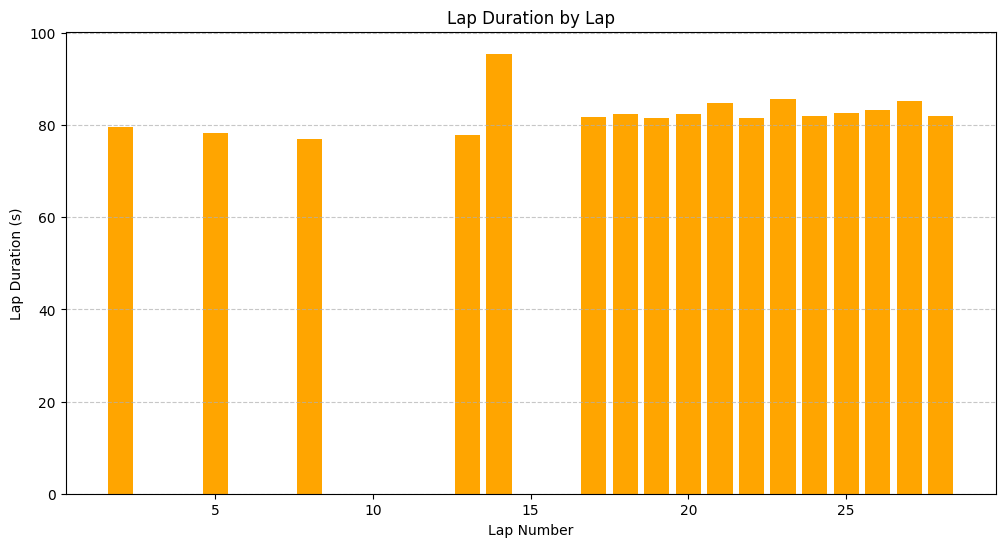

In [23]:
import matplotlib.pyplot as plt

driver_number = 81
filtered_df = laps_stints_df[laps_stints_df['driver_number'] == driver_number]

plt.figure(figsize=(12, 6))
plt.bar(filtered_df['lap_number'], filtered_df['lap_duration'], color='orange')

plt.xlabel("Lap Number")
plt.ylabel("Lap Duration (s)")
plt.title("Lap Duration by Lap")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)